In [1]:
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsfonts}'

allowed_color = 'Green'
polylog_color = 'Black'
noyhat_color = 'Orange'
giantstep_color = 'Blue'
notallowed_color = 'Red'
processnotdefined_color = 'Purple'
sweetspot_color = 'cyan'

In [7]:
from giant_learning.poly_poly import SphericalH3H3Overlaps
from giant_learning.gradient_descent import SphericalGradientDescent

import numpy as np
from sklearn.preprocessing import normalize
from scipy.linalg import orth

p = 1
k = 1
d = 10000
T = 11500
# T = 3
noise = 1e-6
n = int(np.power(d,1.5))
t = 1./np.sqrt(d)  
gamma = .001*n * p * np.power(d,-3/2)
seed = 0

theo_plainsgd_test_errors = np.zeros((T+1))
theo_correlationsgd_test_errors = np.zeros((T+1))
theo_adaptivesgd_test_errors = np.zeros((T+1))

## Initial conditions
rng = np.random.default_rng(seed+1)
Wtarget = orth((normalize(rng.normal(size=(k,d)), axis=1, norm='l2')).T).T
Wtild = normalize(rng.normal(size=(p,d)), axis=1, norm='l2')
Wtild_target = np.einsum('ji,ri,rh->jh', Wtild , Wtarget ,Wtarget)
W0_orth =  normalize(Wtild - Wtild_target, axis=1, norm='l2')
W0 = -(t*normalize(Wtild_target,norm='l2',axis=1) + np.sqrt(1-t**2)*W0_orth)
a0 = np.ones(p) ### It is changed with the new version of the package. The 1/p is included in giant-learning ###

P = Wtarget @ Wtarget.T
M0 = W0 @ Wtarget.T
Q0 = W0 @ W0.T

print(f'P = {P}')
print(f'M0 = {M0}')
print(f'Q0 = {Q0}')



## Theoretical predictions
theo_plain = SphericalH3H3Overlaps(
    P, M0, Q0, a0,
    gamma, noise,
    I4_diagonal=d/n, I4_offdiagonal=True,
    predictor_interaction=True
)

theo_corr = SphericalH3H3Overlaps(
    P, M0, Q0, a0,
    gamma, noise,
    I4_diagonal=d/n, I4_offdiagonal=True,
    predictor_interaction=False
)


theo_plain.train(T, verbose = True)
theo_corr.train(T, verbose = True)

theo_plainsgd_test_errors = np.array(theo_plain.test_errors)
theo_correlationsgd_test_errors = np.array(theo_corr.test_errors)




P = [[1.]]
M0 = [[-0.01]]
Q0 = [[1.]]


100%|██████████| 11500/11500 [00:00<00:00, 16971.86it/s]


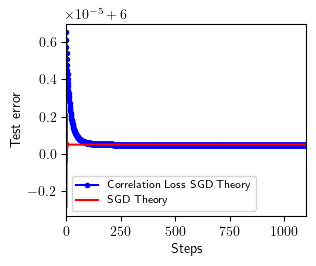

In [9]:
fig, ax = plt.subplots(1,1,figsize=(3.1,2.5))


ax.plot(theo_correlationsgd_test_errors, label=f'Correlation Loss SGD Theory', marker='.', linestyle='-', color='blue')
ax.plot(theo_plainsgd_test_errors, label=f'SGD Theory', marker='', linestyle='-', color='red')

# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('Steps')
ax.set_ylabel('Test error')
ax.set_xlim([0,1100])
# ax.set_ylim([2,5])
ax.legend(fontsize=8, loc='lower left')

plt.savefig('figures/different_SGDs.pdf', bbox_inches = 'tight')

